#  Energy Efficiency Prediction 

1. Problem Definition
 
 One of the important points that must be considered when planning to build a building of any type, is to compute the heating load (HL) and the cooling load (CL). Its importance rooted in tha fact that that it is required to determine the attrinutes of the heating and cooling system that is needed to maintain the temperature of the building in the predefined range. 
 
 To compute the specification of the cooling/heating system, engineers will need information about the the building and of the conditioned space (for example occupancy and activity level). Main features that are studied be an architacture before design a buliding are:
 1. (RC),
 2.surface area,
 3. wall area,
 4. roof area,
 5. overall height,
 6. orientation,
 7. glazing area,
 8. glazing area distribution.
 
 to determine the output variables:
 1. HL,
 2. CL.

First we need to go through the data and based on the characteristic of the data we will choose apprperiate ML algorithms and metrics to evaluate the accuracy of the built models.

Dataset can be downloaded from https://www.kaggle.com/elikplim/eergy-efficiency-dataset.

Required Labraries

In [5]:
# ML libraries
import numpy
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
# Deep Learning Libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping
import keras
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
import torch
import torch.nn as nn
from torch import nn, optim
import torch.nn.functional as F
from sklearn.model_selection import KFold
import time
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [6]:
df=pd.read_csv("D://Dataset//ENB2012_data.csv")

In [7]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [13]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


(array([118., 204.,  61.,  29.,  73.,  94.,  98.,  56.,  21.,  14.]),
 array([10.9  , 14.613, 18.326, 22.039, 25.752, 29.465, 33.178, 36.891,
        40.604, 44.317, 48.03 ]),
 <a list of 10 Patch objects>)

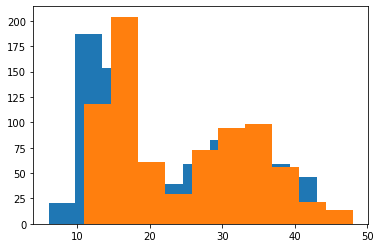

In [152]:
plt.hist((df.Y1))
plt.hist((df.Y2))

# Check Null Values

In [79]:
df.isna().any()

X1    False
X2    False
X3    False
X4    False
X5    False
X6    False
X7    False
X8    False
Y1    False
Y2    False
dtype: bool

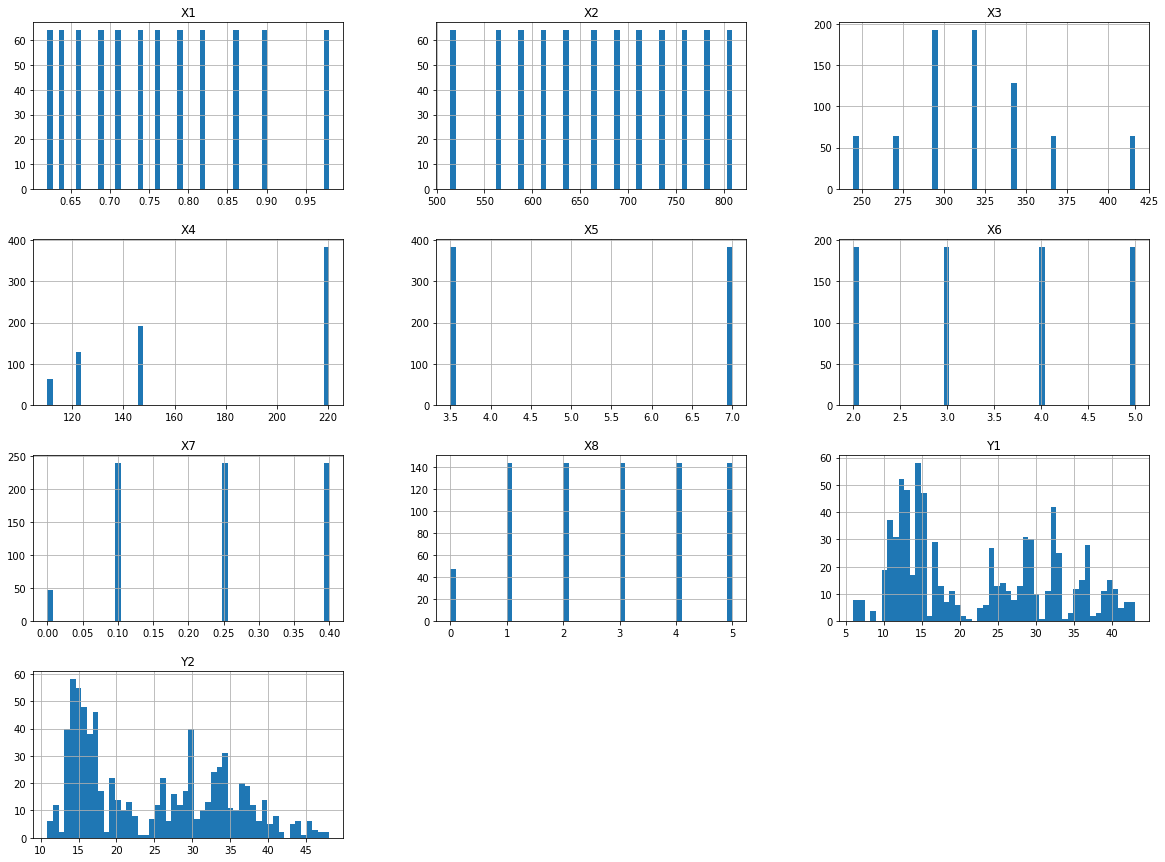

In [23]:
df.hist(bins=50, figsize=(20,15))
plt.show()

# Outlier Detection

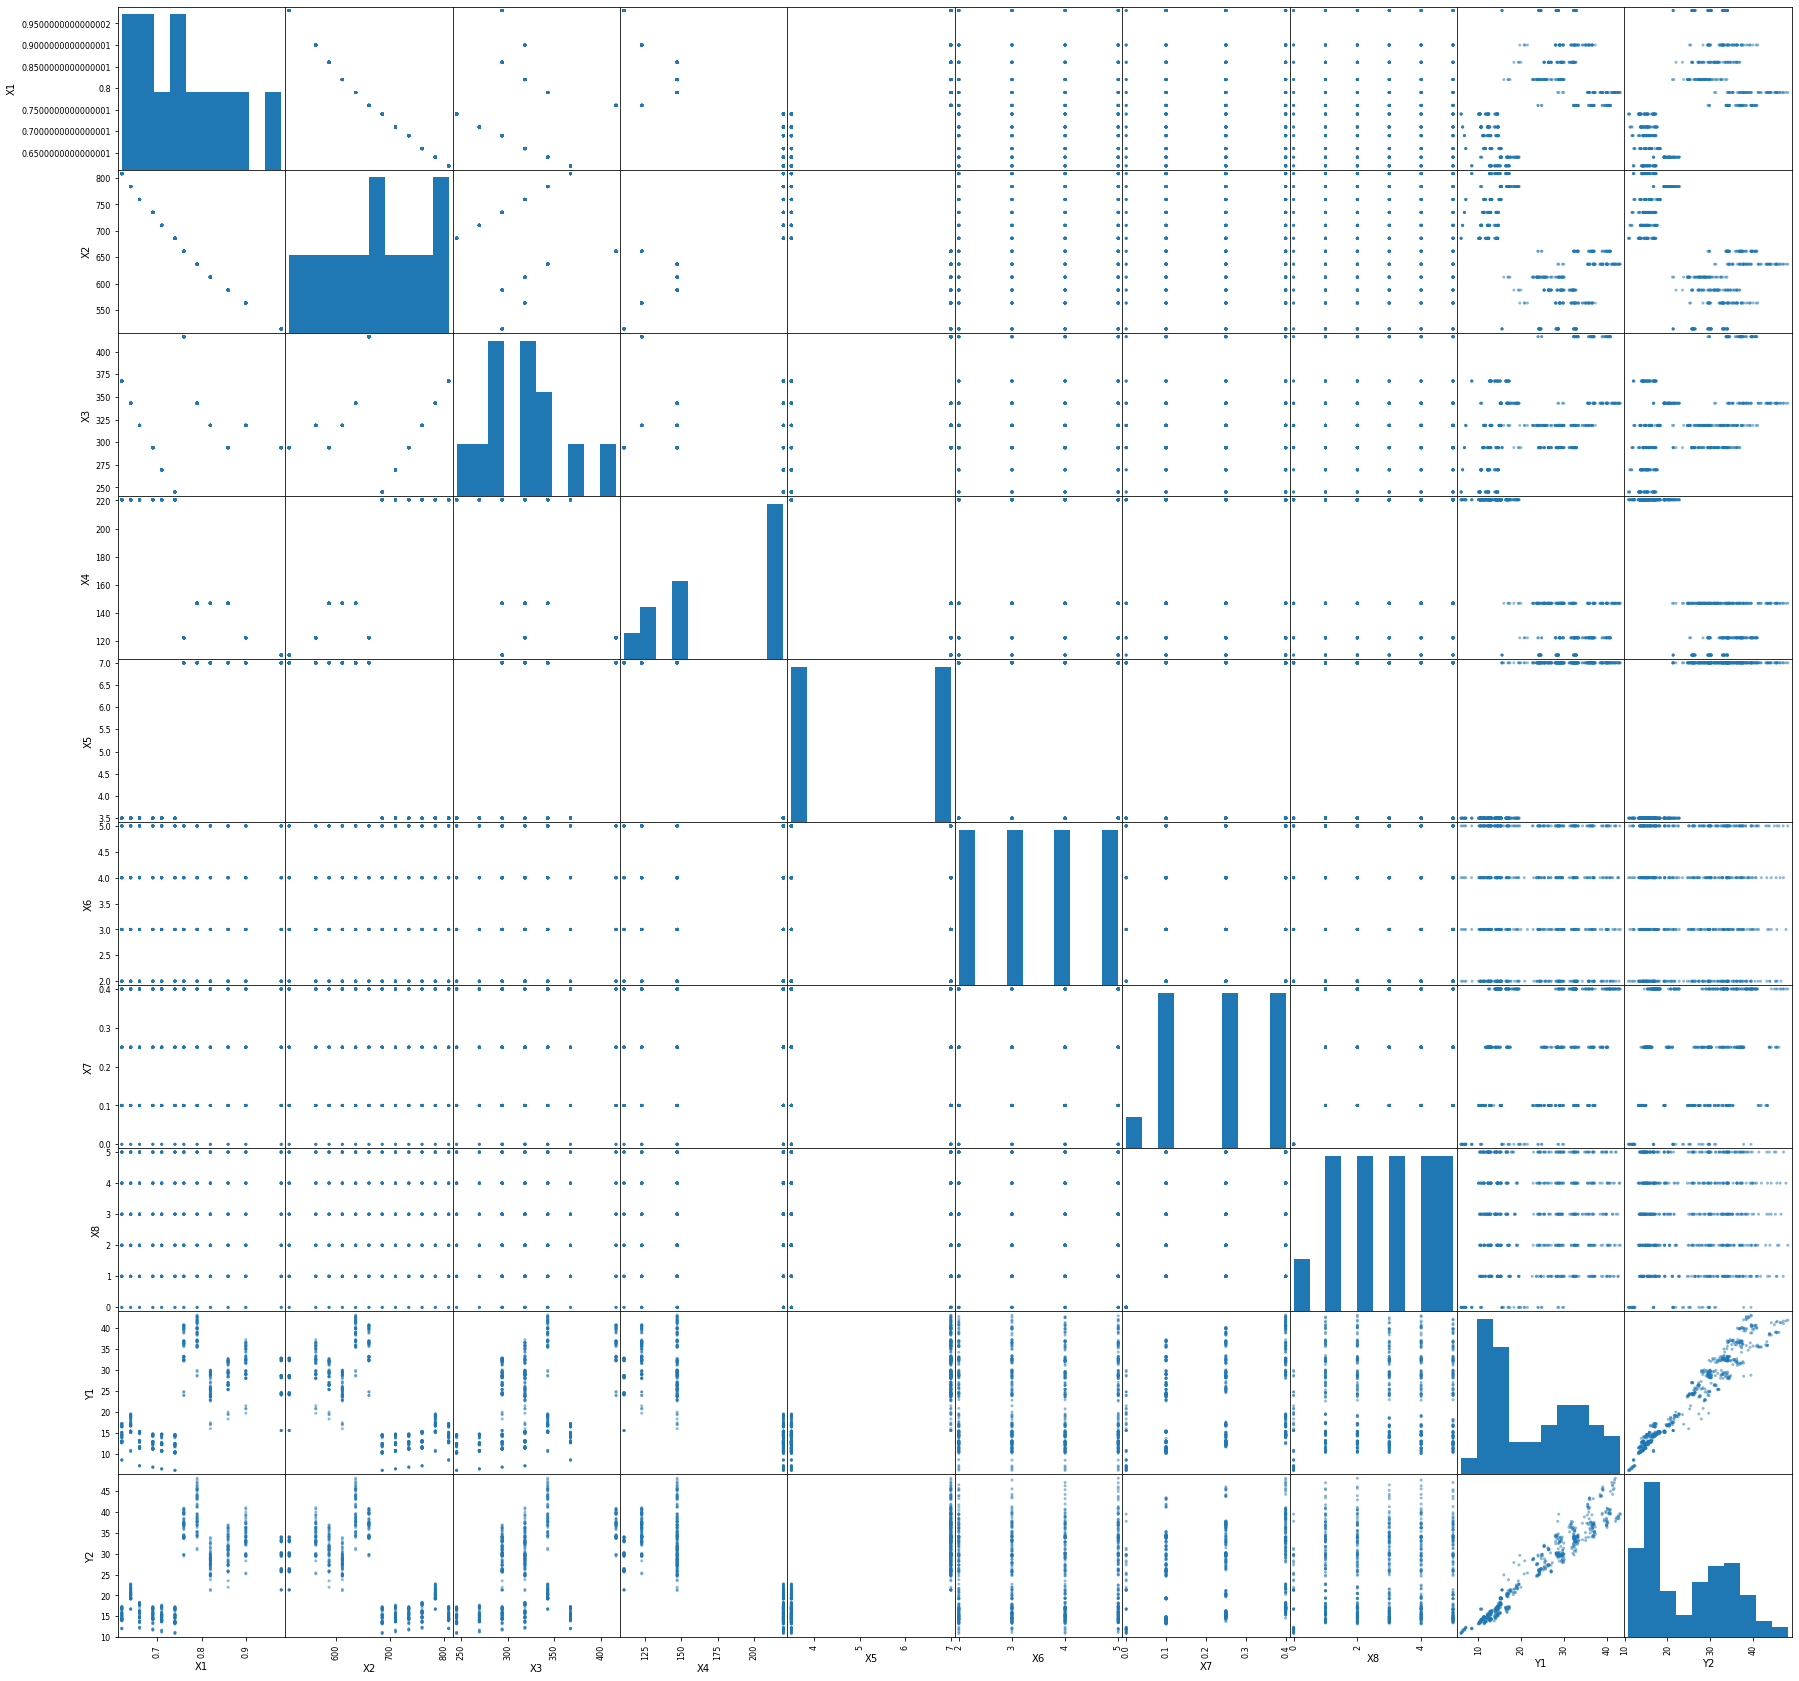

<Figure size 432x288 with 0 Axes>

In [80]:
pd.plotting.scatter_matrix(df,figsize=(30,30))
plt.figure()
plt.show()

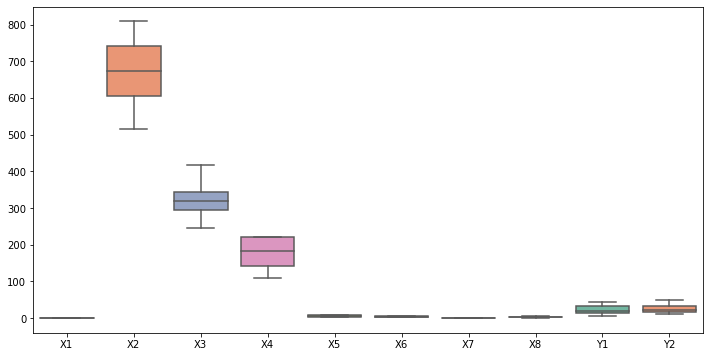

In [83]:
plt.figure(figsize = (12,6))
_ = sns.boxplot(data=df, palette="Set2")

It seems we do not have outliers, lets try IQR method

In [86]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

X1      0.1475
X2    134.7500
X3     49.0000
X4     79.6250
X5      3.5000
X6      1.5000
X7      0.3000
X8      2.2500
Y1     18.6750
Y2     17.5125
dtype: float64


In [88]:
Clean_df= df[~((df< (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Number of Removed Outliers is ",((df.shape)[0])-((Clean_df.shape)[0]))

Number of Removed Outliers is  0


# Depicting Removed Outliers

In [91]:
def OutlierDepict(Scaled_df):
    To_remove_outliers = []
    for feature in Scaled_df.keys():

        Q1 = Scaled_df[feature].quantile(0.25)
        Q3 = Scaled_df[feature].quantile(0.75)

        print("The outliers for the feature '{}':".format(feature))
        OutLiers= list(Scaled_df[~((Scaled_df[feature] >= (Q1 - 1.5 * IQR[feature])) & (Scaled_df[feature] <= (Q3 + 1.5 * IQR[feature])))].index.values)
        display(Scaled_df[~((Scaled_df[feature] >= (Q1 - 1.5 * IQR[feature])) & (Scaled_df[feature] <= (Q3 + 1.5 * IQR[feature])))])
        Column=(Scaled_df[~((Scaled_df[feature] >= (Q1 - 1.5 * IQR[feature])) & (Scaled_df[feature] <= (Q3 + 1.5 * IQR[feature])))])
        print(Column[feature])
        To_remove_outliers.extend(OutLiers)   
    print("OutLiers are {}".format(To_remove_outliers))
    
OutlierDepict(df)

The outliers for the feature 'X1':


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2


Series([], Name: X1, dtype: float64)
The outliers for the feature 'X2':


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2


Series([], Name: X2, dtype: float64)
The outliers for the feature 'X3':


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2


Series([], Name: X3, dtype: float64)
The outliers for the feature 'X4':


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2


Series([], Name: X4, dtype: float64)
The outliers for the feature 'X5':


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2


Series([], Name: X5, dtype: float64)
The outliers for the feature 'X6':


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2


Series([], Name: X6, dtype: int64)
The outliers for the feature 'X7':


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2


Series([], Name: X7, dtype: float64)
The outliers for the feature 'X8':


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2


Series([], Name: X8, dtype: int64)
The outliers for the feature 'Y1':


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2


Series([], Name: Y1, dtype: float64)
The outliers for the feature 'Y2':


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2


Series([], Name: Y2, dtype: float64)
OutLiers are []


In [93]:
df=Clean_df

# Removing Highly Correlated Features

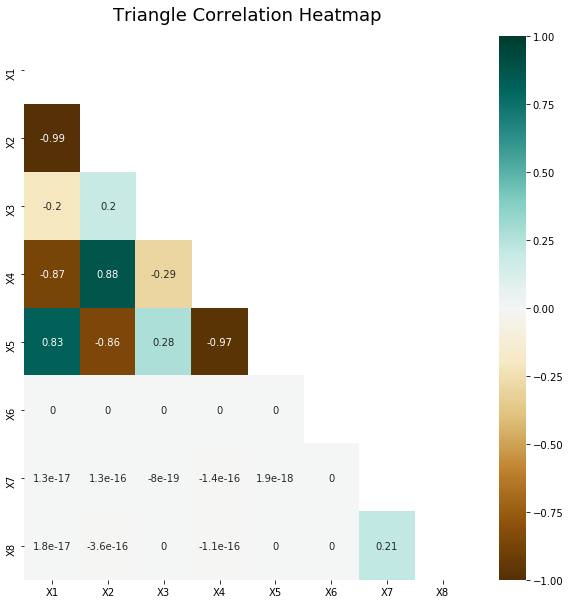

In [78]:
train=df.drop(["Y1", "Y2"], axis=1)
import seaborn as sns
import numpy as np
plt.figure(figsize=(10, 10))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(train.corr(), dtype=np.bool))
heatmap = sns.heatmap(train.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [76]:

def RemCorr(train, tr):
    correlation = train.corr()
    columns = np.full((correlation.shape[0],), True, dtype=bool)
    rem=0
    for i in range(correlation.shape[0]):
        for j in range(i+1, correlation.shape[0]):
            if correlation.iloc[i,j] >= tr or correlation.iloc[i,j] <= -tr:
                print(correlation.iloc[i,j])

                if columns[j]:
                    columns[j] = False
                    rem+=1
    selected_columns = train.columns[columns]
    removed_columns=train.columns[~ columns]
    train= train[selected_columns]

    return train, rem, removed_columns
tr=0.9
X, rem, removed_columns= RemCorr(train,tr)
print("number of removed features: ", rem)
print("Removed Features: ", removed_columns)

-0.9919014616138874
-0.9725122370185892
number of removed features:  2
Removed Features:  Index(['X2', 'X5'], dtype='object')


In [98]:
Y=df[["Y1", "Y2"]]

# we need ML algorithms that have multioutput Capabilities
Inherently Multioutput Regression Algorithms
Some regression machine learning algorithms support multiple outputs directly.

This includes most of the popular machine learning algorithms implemented in the scikit-learn library, such as:

1. LinearRegression 
2. KNeighborsRegressor
3. DecisionTreeRegressor
4. RandomForestRegressor 

# Data Normalization
Since we do not have outliers in our data we can use MinMaxScaler()

In [145]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X.head()

,X1,X3,X4,X6,X7,X8
0,1.000000,0.285714,0.000000,0.000000,0.0,0.0
1,1.000000,0.285714,0.000000,0.333333,0.0,0.0
2,1.000000,0.285714,0.000000,0.666667,0.0,0.0
3,1.000000,0.285714,0.000000,1.000000,0.0,0.0
4,0.777778,0.428571,0.111111,0.000000,0.0,0.0


In [146]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)

In [147]:
rg=RandomForestRegressor()
rg.fit(X_train, Y_train)
rg.score(X_test, Y_test)

0.978557100001541

In [148]:
ML_Models = []
ML_Models.append(('Logistic Regression Regressor', LinearRegression()))
ML_Models.append(('DecisionTree Regressor', DecisionTreeRegressor()))
ML_Models.append(('KNeighbors Regressor', KNeighborsRegressor()))
ML_Models.append(('Random Forest Regressor', RandomForestRegressor()))

In [149]:

num_folds = 10
results = []
names = []

for name, model in ML_Models:
    kfold = KFold(n_splits=num_folds, random_state=123)
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    start = time.time()
    cv_results = cross_val_score(model, X_train, Y_train, cv=cv, scoring='r2')
    end = time.time()
    results.append(cv_results)
    print( "%s: %f (std: %f) (running time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))
    


C:\Users\bidar20m\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Logistic Regression Regressor: 0.879894 (std: 0.022095) (running time: 0.286000)


C:\Users\bidar20m\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


DecisionTree Regressor: 0.966435 (std: 0.009468) (running time: 0.257032)


C:\Users\bidar20m\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNeighbors Regressor: 0.887514 (std: 0.024423) (running time: 0.204084)


C:\Users\bidar20m\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Random Forest Regressor: 0.977784 (std: 0.005436) (running time: 4.932226)


# Deep Learning models for multioutput Regression
1. Keras
2. Pytorch

In [163]:
NCOLS=X_train.shape[1]
features= X_train  
n_cols = features.shape[1]
input_dim = X.shape[1]
output_dim = Y.shape[1]

Model Designing 

In [168]:
model = keras.models.Sequential([
    keras.layers.Dense(200, activation='relu', input_shape = (NCOLS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(2)
])
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['mae']) 
early_stopping_monitor =EarlyStopping(patience=10)

In [169]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 200)               1400      
_________________________________________________________________
dropout_10 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 100)               20100     
_________________________________________________________________
dropout_11 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 50)                5050      
_________________________________________________________________
dropout_12 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 2)                

In [171]:
history=model.fit(features, Y_train, validation_data=(X_test,Y_test), epochs=200, batch_size=32)

Train on 537 samples, validate on 231 samples
Epoch 1/200
537/537 [==============================] - 0s 453us/step - loss: 629.2686 - mae: 23.0699 - val_loss: 579.5605 - val_mae: 21.9203
Epoch 2/200
537/537 [==============================] - 0s 73us/step - loss: 497.8273 - mae: 19.8870 - val_loss: 335.5006 - val_mae: 15.3396
Epoch 3/200
537/537 [==============================] - 0s 88us/step - loss: 198.3767 - mae: 11.3265 - val_loss: 109.9872 - val_mae: 9.2510
Epoch 4/200
537/537 [==============================] - 0s 74us/step - loss: 122.8971 - mae: 9.2172 - val_loss: 73.8374 - val_mae: 7.1252
Epoch 5/200
537/537 [==============================] - 0s 76us/step - loss: 82.7145 - mae: 7.1537 - val_loss: 42.9787 - val_mae: 5.3888
Epoch 6/200
537/537 [==============================] - 0s 84us/step - loss: 64.1425 - mae: 6.2971 - val_loss: 31.6897 - val_mae: 4.1336
Epoch 7/200
537/537 [==============================] - 0s 84us/step - loss: 59.4810 - mae: 5.8222 - val_loss: 27.4122 - val_m

537/537 [==============================] - 0s 71us/step - loss: 31.5292 - mae: 4.0912 - val_loss: 11.0872 - val_mae: 2.1768
Epoch 61/200
537/537 [==============================] - 0s 69us/step - loss: 31.3184 - mae: 4.1805 - val_loss: 11.7714 - val_mae: 2.1524
Epoch 62/200
537/537 [==============================] - 0s 67us/step - loss: 30.8071 - mae: 4.1328 - val_loss: 11.0431 - val_mae: 2.1360
Epoch 63/200
537/537 [==============================] - 0s 71us/step - loss: 30.4035 - mae: 4.1037 - val_loss: 10.9182 - val_mae: 2.1384
Epoch 64/200
537/537 [==============================] - 0s 71us/step - loss: 37.3745 - mae: 4.4230 - val_loss: 16.9347 - val_mae: 2.6615
Epoch 65/200
537/537 [==============================] - 0s 74us/step - loss: 29.7392 - mae: 4.0724 - val_loss: 11.9425 - val_mae: 2.0452
Epoch 66/200
537/537 [==============================] - 0s 67us/step - loss: 31.6996 - mae: 4.2222 - val_loss: 10.6944 - val_mae: 2.1657
Epoch 67/200
537/537 [==============================] 

Epoch 120/200
537/537 [==============================] - 0s 67us/step - loss: 27.1443 - mae: 3.8223 - val_loss: 13.1192 - val_mae: 2.4705
Epoch 121/200
537/537 [==============================] - 0s 97us/step - loss: 26.3663 - mae: 3.7928 - val_loss: 13.3488 - val_mae: 2.4990
Epoch 122/200
537/537 [==============================] - 0s 99us/step - loss: 23.8071 - mae: 3.6382 - val_loss: 8.0325 - val_mae: 1.8571
Epoch 123/200
537/537 [==============================] - 0s 95us/step - loss: 28.0987 - mae: 3.8386 - val_loss: 8.8629 - val_mae: 1.8907
Epoch 124/200
537/537 [==============================] - 0s 91us/step - loss: 25.7354 - mae: 3.6627 - val_loss: 8.1829 - val_mae: 1.9757
Epoch 125/200
537/537 [==============================] - 0s 89us/step - loss: 23.8413 - mae: 3.5798 - val_loss: 9.1143 - val_mae: 1.9195
Epoch 126/200
537/537 [==============================] - 0s 82us/step - loss: 25.7726 - mae: 3.6730 - val_loss: 12.6950 - val_mae: 2.4149
Epoch 127/200
537/537 [===============

537/537 [==============================] - 0s 117us/step - loss: 20.5091 - mae: 3.3324 - val_loss: 9.2146 - val_mae: 1.9786
Epoch 180/200
537/537 [==============================] - 0s 110us/step - loss: 23.9419 - mae: 3.6278 - val_loss: 9.0312 - val_mae: 1.9443
Epoch 181/200
537/537 [==============================] - 0s 132us/step - loss: 21.3595 - mae: 3.4600 - val_loss: 8.8859 - val_mae: 1.9137
Epoch 182/200
537/537 [==============================] - 0s 115us/step - loss: 21.1067 - mae: 3.3940 - val_loss: 7.9154 - val_mae: 1.8938
Epoch 183/200
537/537 [==============================] - 0s 138us/step - loss: 21.7505 - mae: 3.3953 - val_loss: 7.9790 - val_mae: 1.8928
Epoch 184/200
537/537 [==============================] - 0s 102us/step - loss: 24.1665 - mae: 3.6376 - val_loss: 10.6569 - val_mae: 2.1967
Epoch 185/200
537/537 [==============================] - 0s 104us/step - loss: 24.0545 - mae: 3.6572 - val_loss: 8.2069 - val_mae: 1.9252
Epoch 186/200
537/537 [========================

# Plotting the Training Loss

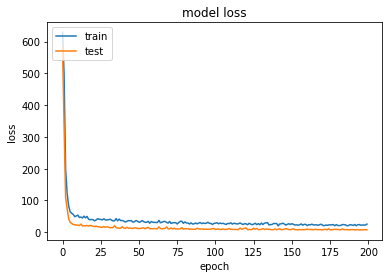

In [172]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [175]:
len(X_train.columns)

6

2. Pytorch

In [178]:

class Model(nn.Module):
    def __init__(self):
        super().__init__()

        self.fc1 = nn.Linear(6, 5)
        self.fc2 = nn.Linear(5, 4)
        self.fc3 = nn.Linear(4, 3)
        self.fc4 = nn.Linear(3, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        #x=F.dropout(x, p=0.1)
        x = F.relu(self.fc2(x))
        #x=F.dropout(x, p=0.1)
        x = F.relu(self.fc3(x))
        #x=F.dropout(x, p=0.1)
        x = F.relu(self.fc4(x))

        return x

model = Model()    


# Spliting the train data into batches

In [181]:
def batch(X,y, num_batch):
    nX= np.array_split(X, num_batch)
    ny= np.array_split(y, num_batch)
    return nX, ny

BX_train,By_train=batch(X_train, Y_train, 20)

X_val = torch.from_numpy(np.array(X_test)).float() 
y_val = torch.from_numpy(np.array(Y_test)).float()

# Training the Model

In [182]:

model =Model()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

In [184]:
iter=0
test_loss=0
epochs = 1000
for epoch in range(epochs):
    model.train()
    train_loss = 0
    for i in range(len(BX_train)):
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        # Convert numpy array to torch Variable and then Forward to get output
        output = model(torch.from_numpy(np.array(BX_train[i])).float())
         # Calculate Loss
        loss =(criterion((output), (torch.from_numpy(np.array(By_train[i])).float())))
        # Getting gradients w.r.t. parameters
        loss.backward()
        # Updating parameters
        optimizer.step()
        # we need to add the loss of all batches 
        train_loss += loss.item()
        iter+=1
        
        if iter%100==0:
            test_loss = 0
            model.eval()
            Outputs= model(X_val)
            test_loss=(criterion((Outputs),(y_val))) 
            print("Epoch: {} ".format(epoch),"Training Loss: {:.3f} ".format(train_loss),"Test Loss: {:.3f} ".format(test_loss))

Epoch: 4  Training Loss: 6216.825  Test Loss: 308.188 
Epoch: 9  Training Loss: 6248.265  Test Loss: 308.010 
Epoch: 14  Training Loss: 6230.799  Test Loss: 307.880 
Epoch: 19  Training Loss: 6222.439  Test Loss: 307.596 
Epoch: 24  Training Loss: 6221.935  Test Loss: 307.470 
Epoch: 29  Training Loss: 6222.787  Test Loss: 307.396 
Epoch: 34  Training Loss: 6221.111  Test Loss: 307.310 
Epoch: 39  Training Loss: 6218.725  Test Loss: 307.228 
Epoch: 44  Training Loss: 6216.087  Test Loss: 307.142 
Epoch: 49  Training Loss: 6213.873  Test Loss: 307.047 
Epoch: 54  Training Loss: 6212.519  Test Loss: 306.976 
Epoch: 59  Training Loss: 6211.082  Test Loss: 306.874 
Epoch: 64  Training Loss: 6209.755  Test Loss: 306.790 
Epoch: 69  Training Loss: 6204.613  Test Loss: 306.531 
Epoch: 74  Training Loss: 6190.025  Test Loss: 305.884 
Epoch: 79  Training Loss: 6153.422  Test Loss: 304.229 
Epoch: 84  Training Loss: 6136.069  Test Loss: 303.227 
Epoch: 89  Training Loss: 6131.219  Test Loss: 303

Epoch: 744  Training Loss: 108.639  Test Loss: 5.750 
Epoch: 749  Training Loss: 120.466  Test Loss: 6.098 
Epoch: 754  Training Loss: 111.540  Test Loss: 5.636 
Epoch: 759  Training Loss: 123.097  Test Loss: 5.813 
Epoch: 764  Training Loss: 115.245  Test Loss: 5.557 
Epoch: 769  Training Loss: 104.388  Test Loss: 5.460 
Epoch: 774  Training Loss: 130.655  Test Loss: 6.105 
Epoch: 779  Training Loss: 104.780  Test Loss: 5.466 
Epoch: 784  Training Loss: 117.586  Test Loss: 5.652 
Epoch: 789  Training Loss: 111.311  Test Loss: 5.326 
Epoch: 794  Training Loss: 113.095  Test Loss: 5.270 
Epoch: 799  Training Loss: 103.019  Test Loss: 5.263 
Epoch: 804  Training Loss: 106.079  Test Loss: 5.330 
Epoch: 809  Training Loss: 106.516  Test Loss: 5.385 
Epoch: 814  Training Loss: 101.063  Test Loss: 5.258 
Epoch: 819  Training Loss: 142.416  Test Loss: 7.525 
Epoch: 824  Training Loss: 110.094  Test Loss: 5.413 
Epoch: 829  Training Loss: 100.891  Test Loss: 5.207 
Epoch: 834  Training Loss: 1